In [130]:
merged_df = pd.read_csv("../data/merged_dataset_ver.1.csv")

In [ ]:
#################
# 이상치 처리 
#################
# 조건: final_result가 Fail이고, date_unregistration이 null이 아님
condition1 = (merged_df["final_result"] == "Fail") & (merged_df["date_unregistration"].notnull())

# 해당 조건을 만족하는 행 제거
merged_df = merged_df[~condition1]

# 조건 정의: date_registration이 NaN이고 final_result가 Withdrawn인 경우
condition = (merged_df["date_registration"].isna()) & (merged_df["final_result"] == "Withdrawn")

# 해당 조건에 맞는 행 제거
merged_df = merged_df[~condition]


In [ ]:
merged_df.info()   # 행 32545

<class 'pandas.core.frame.DataFrame'>
Index: 32545 entries, 0 to 32592
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  object 
 6   imd_band              31434 non-null  object 
 7   age_band              32545 non-null  object 
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  final_result          32545 non-null  object 
 12  date_registration     32539 non-null  float64
 13  date_unregistration   10024 non-null  float64
 14  sum_click             32545 non-null  float64
 15  avg_score             32

In [135]:
merged_df["target"] = merged_df["final_result"].map({
    "Pass": 0,
    "Distinction": 0,
    "Fail": 1,
    "Withdrawn": 1
})

# 변환되지 않은 값 확인
unmapped = merged_df[merged_df["target"].isna()]
if not unmapped.empty:
    print("⚠️ 변환되지 않은 값이 있습니다:")
    print(unmapped["final_result"].unique())

In [138]:
# 3. final_result 컬럼 삭제
# merged_df = merged_df.drop(columns=["final_result"])
# merged_df
merged_df.to_csv("../data/merged_dataset_ver1.1.csv", index=False, encoding="utf-8-sig")

In [141]:
import pandas as pd 
merged_df = pd.read_csv("../data/merged_dataset_ver1.1.csv")
merged_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,sum_click,avg_score,banked_ratio,is_dropout,target
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,-159.0,NaN,934.0,82.000000,0.0,0,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,-53.0,NaN,1435.0,66.400000,0.0,0,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,-92.0,12.0,281.0,0.000000,0.0,1,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,-52.0,NaN,2158.0,76.000000,0.0,0,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,-176.0,NaN,1034.0,54.400000,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32540,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,-4.0,NaN,41.0,0.000000,0.0,0,1
32541,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,-23.0,NaN,893.0,88.111111,0.0,0,0
32542,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,-129.0,NaN,312.0,76.666667,0.0,0,0
32543,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,-49.0,101.0,275.0,91.500000,0.0,1,1


In [142]:
# x,y 나누기
X = merged_df.drop(columns='target').values
y = merged_df['target'].values
X.shape,  y.shape

((32545, 17), (32545,))

In [ ]:
X = merged_df.drop(columns='target').values
y = merged_df['target'].values
X.shape,  y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [ ]:
# merged_df["final_result"].isna([merged_df['date_unregistration'] == 0])
# df[df['결측치열'].isna()][['열']]
# unique_result = df[df['date_unregistration'].isna()]['final_result'].unique()
merged_df[merged_df['date_unregistration'].notnull()]["final_result"].value_counts()


final_result
Withdrawn    10063
Fail             9
Name: count, dtype: int64

In [49]:
merged_df[merged_df['date_registration'].isna()]["final_result"].value_counts()


final_result
Withdrawn    39
Fail          5
Pass          1
Name: count, dtype: int64

In [3]:
merged_df.isnull().sum()

code_module                 0
code_presentation           0
id_student                  0
gender                      0
region                      0
highest_education           0
imd_band                 1111
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
date_registration          45
date_unregistration     22521
sum_click                   0
avg_score                   0
banked_ratio                0
is_dropout                  0
dtype: int64

In [9]:
merged_df.notnull().sum()

code_module             32593
code_presentation       32593
id_student              32593
gender                  32593
region                  32593
highest_education       32593
imd_band                31482
age_band                32593
num_of_prev_attempts    32593
studied_credits         32593
disability              32593
final_result            32593
date_registration       32548
date_unregistration     10072
sum_click               32593
avg_score               32593
banked_ratio            32593
is_dropout              32593
dtype: int64

##########################################
결측치 처리 과정
##########################################

In [4]:
%pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 19.2 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 17.7 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 19.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 15.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/41.0 MB 33.5 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/41.0 MB 16.8 MB/s eta 0:00:03
   ----------- ---------------------------- 12.1/41.0 MB 18.8 MB/s eta 0:00:02
   --------------- ------------------------ 16.0/41.0 MB 18.9 MB/s eta 0:00:02
   ------------------ --------------------- 18.6/41.0 MB 17.8 MB/s eta 0:00:02
   ---------------------- ----------------- 22.5/41.0 MB 18.2 MB/s eta 0:00:02
   --


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer   # 결측치값 대체.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [8]:
merged_df["final_result"].value_counts()

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

In [6]:
merged_df["imd_band"].value_counts()

imd_band
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: count, dtype: int64

In [57]:
merged_df["banked_ratio"].value_counts()

banked_ratio
0.000000    31605
0.500000      287
0.333333       73
1.000000       61
0.250000       57
            ...  
0.777778        1
0.700000        1
0.833333        1
0.857143        1
0.875000        1
Name: count, Length: 68, dtype: int64

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              31482 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  date_registration     32548 non-null  float64
 12  date_unregistration   10072 non-null  float64
 13  sum_click             32593 non-null  float64
 14  avg_score             32593 non-null  float64
 15  banked_ratio       

In [ ]:
merged_df['date_registration'].isnull().value_counts()

date_registration
-22.0     1034
-29.0      982
-24.0      741
-25.0      730
-23.0      729
          ... 
-275.0       1
 83.0        1
 40.0        1
 18.0        1
 110.0       1
Name: count, Length: 332, dtype: int64

In [40]:
import pandas as pd 
merged_df = pd.read_csv("../data/merged_dataset_ver1.1.1.csv")

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32545 non-null  object 
 1   code_presentation     32545 non-null  object 
 2   id_student            32545 non-null  int64  
 3   gender                32545 non-null  object 
 4   region                32545 non-null  object 
 5   highest_education     32545 non-null  object 
 6   imd_band              31434 non-null  object 
 7   age_band              32545 non-null  object 
 8   num_of_prev_attempts  32545 non-null  int64  
 9   studied_credits       32545 non-null  int64  
 10  disability            32545 non-null  object 
 11  date_registration     32539 non-null  float64
 12  date_unregistration   10024 non-null  float64
 13  sum_click             32545 non-null  float64
 14  avg_score             32545 non-null  float64
 15  banked_ratio       

In [27]:
merged_df['highest_education'].value_counts()   

highest_education
A Level or Equivalent          14025
Lower Than A Level             13138
HE Qualification                4723
No Formal quals                  346
Post Graduate Qualification      313
Name: count, dtype: int64

In [150]:
merged_df['age_band'].value_counts()

age_band
0-35     22908
35-55     9423
55<=       214
Name: count, dtype: int64

In [151]:
merged_df['imd_band'].value_counts()

imd_band
20-30%     3648
30-40%     3536
10-20      3510
0-10%      3304
40-50%     3250
50-60%     3117
60-70%     2900
70-80%     2876
80-90%     2759
90-100%    2534
Name: count, dtype: int64

In [13]:
categorical_columns = ['code_module','code_presentation','id_student','gender','region','highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'disability', 'is_dropout']
numeric_columns = ['studied_credits', 'date_registration', 'date_unregistration', 'sum_click', 'avg_score', 'banked_ratio']
target = "target"  # index =17

categorical_columns_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10,16]
numeric_columns_index = [9,11,12,13,14,15]

In [69]:
# # ###############################
# # #결측치 처리
# # #결측치 처리 컬럼: imd_band(범주형 -> 최빈값으로 처리), date_registration(수치형 -> mean으로 처리)
# # # date_unregisitration(9999값으로 채우기)

# # # 1. 결측치 직접 처리: date_unregistration → 9999
merged_df["date_unregistration"] = merged_df["date_unregistration"].fillna(9999)

# # # 2. 인코딩 직접 처리

# # # 1) highest_education 학력별로 부여
# education_order = {
#     "No Formal Quals": 0,
#     "Lower Than A Level": 1,
#     "A Level Or Equivalent": 2,
#     "He Qualification": 3,
#     "Post Graduate Qualification": 4
# }

# # 문자열 정리 후 replace 사용
# merged_df["highest_education"] = merged_df["highest_education"].str.strip().str.title()
# merged_df["highest_education"] = merged_df["highest_education"].replace(education_order)
# merged_df["highest_education"].value_counts()

# # 2) age_band 중간 값으로 변경
# age_map = {
#     "0-35": 30,     # 또는 17.5, 20도 가능 (의도에 따라)
#     "35-55": 45,
#     "55<=": 60      # 55세 이상이므로 60 또는 65로 추정
# }

# merged_df["age_band"] = merged_df["age_band"].str.strip().str.title()
# merged_df["age_band"] = merged_df["age_band"].replace(age_map)
# merged_df["age_band"].value_counts()
# # # merged_df["age_band"] = merged_df["age_band"].map(age_map)

# # # # # 3) 취약계층 서열화 
# imd_order = {
#     "0-10%": 1,
#     "10-20": 2,
#     "20-30%": 3,
#     "30-40%": 4,
#     "40-50%": 5,
#     "50-60%": 6,
#     "60-70%": 7,
#     "70-80%": 8,
#     "80-90%": 9,
#     "90-100%": 10
# }

# merged_df["imd_band"] = merged_df["imd_band"].str.strip().str.title()
# merged_df["imd_band"] = merged_df["imd_band"].replace(imd_order)
# merged_df["imd_band"].value_counts()
# # merged_df["imd_band"] = merged_df["imd_band"].map(imd_order)

# merged_df.info()

# # # # 1. 원래 컬럼 순서 저장
original_columns = merged_df.columns.tolist()

# 2. ColumnTransformer 설정
na_transformer = ColumnTransformer([
    ("category_imputer", SimpleImputer(strategy="most_frequent"), ['imd_band']),
    ("number_imputer", SimpleImputer(strategy="mean"), ['date_registration'])
], remainder="passthrough")

# 3. 처리 대상 및 passthrough 대상 정리
processed_columns = ['imd_band', 'date_registration']
passthrough_columns = [col for col in merged_df.columns if col not in processed_columns]

# 4. fit_transform 적용
na_values_array = na_transformer.fit_transform(merged_df)

# 5. DataFrame으로 변환 + 컬럼 순서 복원
na_values_df = pd.DataFrame(na_values_array, columns=processed_columns + passthrough_columns)
na_values_df = na_values_df[original_columns]  # 순서 복원!
na_values_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date_registration,date_unregistration,sum_click,avg_score,banked_ratio,is_dropout,target
0,AAA,2013J,11391,M,East Anglian Region,3,10.0,60,0,240,N,-159.0,9999.0,934.0,82.0,0.0,0,0
1,AAA,2013J,28400,F,Scotland,3,3.0,45,0,60,N,-53.0,9999.0,1435.0,66.4,0.0,0,0
2,AAA,2013J,30268,F,North Western Region,2,4.0,45,0,60,Y,-92.0,12.0,281.0,0.0,0.0,1,1
3,AAA,2013J,31604,F,South East Region,2,6.0,45,0,60,N,-52.0,9999.0,2158.0,76.0,0.0,0,0
4,AAA,2013J,32885,F,West Midlands Region,1,6.0,30,0,60,N,-176.0,9999.0,1034.0,54.4,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32540,GGG,2014J,2640965,F,Wales,1,2.0,30,0,30,N,-4.0,9999.0,41.0,0.0,0.0,0,1
32541,GGG,2014J,2645731,F,East Anglian Region,1,5.0,45,0,30,N,-23.0,9999.0,893.0,88.111111,0.0,0,0
32542,GGG,2014J,2648187,F,South Region,2,3.0,30,0,30,Y,-129.0,9999.0,312.0,76.666667,0.0,0,0
32543,GGG,2014J,2679821,F,South East Region,1,10.0,45,0,30,N,-49.0,101.0,275.0,91.5,0.0,1,1


In [70]:
X = na_values_df.drop(columns='target').values
# X = X.astype('float32')
y = na_values_df['target'].values
# y = y.astype(int)
X.shape,  y.shape

((32545, 17), (32545,))

In [58]:
na_values_df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
date_registration       0
date_unregistration     0
sum_click               0
avg_score               0
banked_ratio            0
is_dropout              0
target                  0
dtype: int64

In [71]:
fe_transformer = ColumnTransformer([
    ("category_ohe", OneHotEncoder(), [0, 1, 3, 4, 5, 6, 7, 8, 10,16]),# feature의 index로 지정.   # index는 앞에 했던 배열로 적용해줘야함.
    ("number_scaler", StandardScaler(), [9,11,12,13,14,15])    #feature Scaling은 연속형끼리 같은 방식을 사용 (standard or MinMax 중 택1)
])
### DataFrame이 입력일 경우 컬럼명이나 컬럼 index를 지정할 수 있다.
### ndarray가 입력일 경우 컬럼(feature) index를 지정.
new_merged_df = fe_transformer.fit_transform(X)
print(new_merged_df)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 520714 stored elements and shape (32545, 61)>
  Coords	Values
  (0, 0)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 13)	1.0
  (0, 29)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 44)	1.0
  (0, 51)	1.0
  (0, 53)	1.0
  (0, 55)	3.905125197007625
  (0, 56)	-1.8185928989610989
  (0, 57)	0.6671221427396934
  (0, 58)	-0.1670317117402033
  (0, 59)	0.7100890620793591
  (0, 60)	-0.15938465469985008
  (1, 0)	1.0
  (1, 8)	1.0
  (1, 11)	1.0
  (1, 19)	1.0
  (1, 29)	1.0
  (1, 33)	1.0
  (1, 42)	1.0
  (1, 44)	1.0
  (1, 51)	1.0
  :	:
  (32543, 44)	1.0
  (32543, 51)	1.0
  (32543, 54)	1.0
  (32543, 55)	-1.211159957215567
  (32543, 56)	0.4144516877944941
  (32543, 57)	-1.487791864498921
  (32543, 58)	-0.5562260670917427
  (32543, 59)	1.0137563256706723
  (32543, 60)	-0.15938465469985008
  (32544, 6)	1.0
  (32544, 10)	1.0
  (32544, 11)	1.0
  (32544, 25)	1.0
  (32544, 29)	1.0
  (32544, 36)	1.0
  (32544, 42)	1.0
  (32544, 44)	1.0
  (32544, 51)	1.0
  (32544, 53)	1

In [65]:
new_merged_df.dtype

dtype('float64')

In [73]:
# X = new_merged_df.drop(columns='target').values
# y = na_values_df[target]

X = new_merged_df
X = X.astype('float32')
# y = new_merged_df['target'].values
y = y.astype(int)
X.shape,  y.shape
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

((32545, 61), (32545,))

In [61]:
%pip install XGBoost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 10.5 MB/s eta 0:00:15
    --------------------------------------- 3.4/150.0 MB 10.6 MB/s eta 0:00:14
   - -------------------------------------- 5.2/150.0 MB 8.9 MB/s eta 0:00:17
   -- ------------------------------------- 7.6/150.0 MB 9.6 MB/s eta 0:00:15
   -- ------------------------------------- 9.7/150.0 MB 9.7 MB/s eta 0:00:15
   --- ------------------------------------ 12.1/150.0 MB 10.0 MB/s eta 0:00:14
   --- ------------------------------------ 14.4/150.0 MB 10.2 MB/s eta 0:00:14
   ---- ----------------------------------- 16.8/150.0 MB 10.4 MB/s eta 0:00:13
   ----- ---------------------------------- 19.1/150.0 MB 10.5 MB/s eta 0:00:13
   ----- ---------------------------------- 21.5/150.0 MB 10.6 MB/s eta 0:00:13
   ------ --------------------------------- 24.1/150.0 MB 10.7 MB/s eta 0:00:12
   ------ --------------------------------- 26.2/150.0 MB


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.1 MB 11.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 11.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.2 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.8 MB/s eta 0:


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



 >>> Tuning Decision Tree...
Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\Playdata\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Playdata\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Playdata\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\Playdata\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    v

- Complete:1.50524초

 >>> Tuning Random Forest...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
- Complete:6.58511초

 >>> Tuning KNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\Playdata\myenv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78122613        nan]
  warnings.warn(


- Complete:23.71144초

 >>> Tuning SVM...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
- Complete:40.07108초

=== Final Comparison ===
        Model                                                                       Best Params  Train Accuracy (CV)  Test Accuracy
          SVM                       {'clf__C': 0.1, 'clf__gamma': 0.1, 'clf__kernel': 'linear'}             0.883469       0.888155
Random Forest                     {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}             0.885351       0.887694
Decision Tree {'max_depth': 4, 'max_features': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 2}             0.860693       0.858657
          KNN                                {'clf__n_neighbors': 5, 'clf__weights': 'uniform'}             0.781226       0.789676


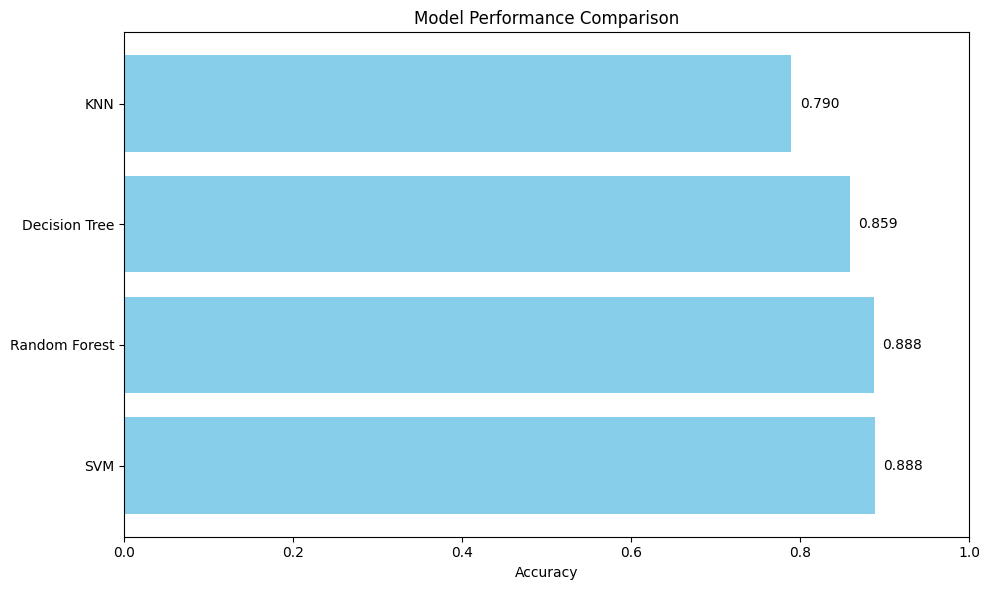


 Decision Tree Best Model Report
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3056
           1       0.92      0.80      0.86      3453

    accuracy                           0.86      6509
   macro avg       0.86      0.86      0.86      6509
weighted avg       0.87      0.86      0.86      6509


 Random Forest Best Model Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3056
           1       0.95      0.83      0.89      3453

    accuracy                           0.89      6509
   macro avg       0.89      0.89      0.89      6509
weighted avg       0.90      0.89      0.89      6509


 KNN Best Model Report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      3056
           1       0.85      0.73      0.79      3453

    accuracy                           0.79      6509
   macro avg       0.79      0.79   

In [77]:
import sys
from pathlib import Path
# 상위 폴더를 Python 경로에 추가
sys.path.append(str(Path.cwd().parent))
from util.model_tuning import auto_model_tuning
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier


base_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', SVC(random_state=42))
    ])
    # "XGBoost": XGBClassifier(random_state=42),
    # "Logistic Regression": Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('clf', LogisticRegression(max_iter=1000, random_state=42))
    # ]),
    # "SGDClassifier": Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('clf', SGDClassifier(random_state=42))
    # ]),
    # "MLPClassifier": Pipeline([
    #     ('scaler', StandardScaler()),
    #     ('clf', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
    # ])
}

param_grids = {
    "Decision Tree": {
        "max_depth":range(1, 5),
        "max_leaf_nodes": [1, 3, 5, 10],
        "min_samples_leaf": [2, 5, 10],
        "max_features": [1, 5, 10]},
    "Random Forest": {
        'n_estimators': [50, 100], #200, 300],
        'max_depth':[10],#, 20, 30],
        "min_samples_leaf": [2]#, 5, 10],
        },
    "KNN": {
        'clf__n_neighbors':[3,5],
        'clf__weights': ['uniform', 'distance']},
    "SVM": {
        'clf__C': [0.1], #[0.001,   #, 0.1, 1, 10],
        'clf__gamma': [0.1], #[0.01, 0.1, 1, 10],
        'clf__kernel': ['linear']}
    # "XGBoost": {
    #     'n_estimators': [10, 30, 50, 100, 200, 400, 1000],
    #     'learning_rate' : [0.1, 0.01, 0.001],
    #     'max_depth': range(1,7),
    #     'learning_rate':[0.01, 0.001]},
    # "Logistic Regression": {
    #     'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # 규제 강도
    #     'clf__penalty': ['l1', 'l2'],  # 규제 유형
    #     'clf__solver': ['saga']},
    # "SGDClassifier": {
    #     'clf__loss': ['log_loss', 'hinge'],  # log_loss=로지스틱, hinge=SVM
    #     'clf__alpha': [0.0001, 0.001, 0.01],  # 규제 계수
    #     'clf__learning_rate': ['constant', 'adaptive'],
    #     'clf__eta0': [0.01, 0.1]},
    # "MLPClassifier": {
    #     'clf__hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'clf__activation': ['relu', 'tanh'],
    #     'clf__alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'clf__learning_rate_init': [0.001, 0.01],
    #     'clf__batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)

In [ ]:
base_models = {
    # "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Random Forest": RandomForestClassifier(random_state=42),
    # "KNN": Pipeline([
    #     ('scaler', StandardScaler(with_mean=False)),
    #     ('clf', KNeighborsClassifier())
    # ]),
    # "SVM": Pipeline([
    #     ('scaler', StandardScaler(with_mean=False)),
    #     ('clf', SVC(random_state=42))
    # ])
    "XGBoost": XGBClassifier(random_state=42),
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "SGDClassifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SGDClassifier(random_state=42))
    ]),
    "MLPClassifier": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
    ])
}

param_grids = {
    # "Decision Tree": {
    #     "max_depth":range(1, 5),
    #     "max_leaf_nodes": [1, 3, 5, 10],
    #     "min_samples_leaf": [2, 5, 10],
    #     "max_features": [1, 5, 10]},
    # "Random Forest": {
    #     'n_estimators': [50, 100], #200, 300],
    #     'max_depth':[10],#, 20, 30],
    #     "min_samples_leaf": [2]#, 5, 10],
    #     },
    # "KNN": {
    #     'clf__n_neighbors':[3,5],
    #     'clf__weights': ['uniform', 'distance']},
    # "SVM": {
    #     'clf__C': [0.1], #[0.001,   #, 0.1, 1, 10],
    #     'clf__gamma': [0.1], #[0.01, 0.1, 1, 10],
    #     'clf__kernel': ['linear']}
    "XGBoost": {
        'n_estimators': [10, 30, 50], #, 100, 200, 400, 1000],
        'learning_rate' : [0.01], #[0.1, 0.01, 0.001],
        'max_depth': [3,4,5],
        'learning_rate':[0.01]}, #, 0.001]},
    "Logistic Regression": {
        'clf__C': [0.01], #[0.001, 0.01, 0.1, 1, 10, 100],  # 규제 강도
        'clf__penalty': ['l2'], #['l1', 'l2'],  # 규제 유형
        'clf__solver': ['saga']},
    "SGDClassifier": {
        'clf__loss': ['log_loss'], #, 'hinge'],  # log_loss=로지스틱, hinge=SVM
        'clf__alpha': [0.01], # [0.0001, 0.001, 0.01],  # 규제 계수
        'clf__learning_rate': ['constant'], #, 'adaptive'],
        'clf__eta0': [0.01] #, 0.1]},
    # "MLPClassifier": {
    #     'clf__hidden_layer_sizes': [(50,), (100,), (50, 30)],
    #     'clf__activation': ['relu', 'tanh'],
    #     'clf__alpha': [0.0001, 0.001],  # L2 규제 강도
    #     'clf__learning_rate_init': [0.001, 0.01],
    #     'clf__batch_size': [32, 64]
    # }
}

# 함수 실행
results_df, best_models = auto_model_tuning(base_models, param_grids, X, y)